# Análise E-commerce brasileiro - Aplicando KDD (Knowledge Discovery in Databases) ao Olist Dataset

## O dataset pode ser encontrado <a hrfe="https://www.kaggle.com/olistbr/brazilian-ecommerce#olist_order_items_dataset.csv">aqui</a>.

### Para esse conjunto de dados, utilizarei o KDD (Knowledge Discovery in Databases), uma técnica de análise de dados extremamente útil para guiar um projeto de Data Mining. Seu foco é voltado a extrair conhecimentos a partir dos dados, é um guia generalista possível de se aplicar nas mais diversas áreas.
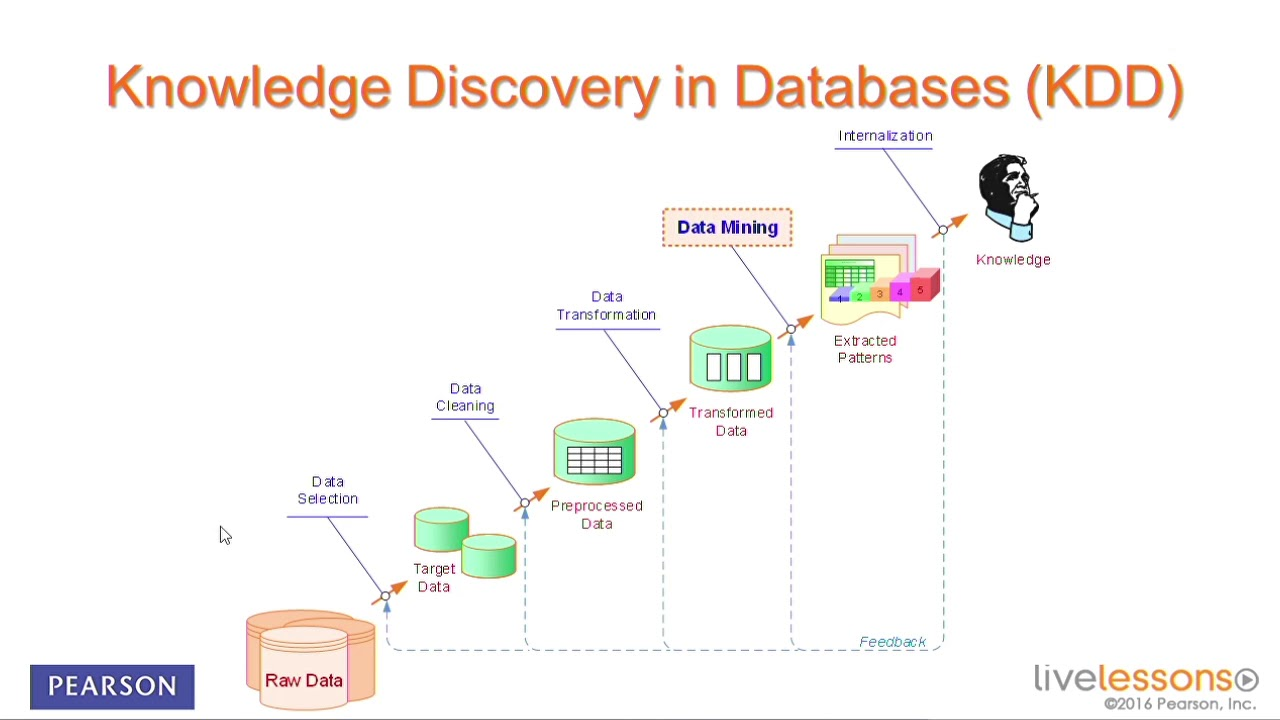
Fonte da imagem: https://www.youtube.com/watch?v=0PDq4wYZqP0

## 1. Importação dos Dados (Raw Data)

In [140]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [141]:
# Importando os dados
df_costumers = pd.read_csv("olist_customers_dataset.csv")
df_orders = pd.read_csv("olist_orders_dataset.csv")
df_ord_itens = pd.read_csv("olist_order_items_dataset.csv")
df_products = pd.read_csv("olist_products_dataset.csv")

In [142]:
df_costumers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [143]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [144]:
df_ord_itens.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [145]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
product_id                    32951 non-null object
product_category_name         32341 non-null object
product_name_lenght           32341 non-null float64
product_description_lenght    32341 non-null float64
product_photos_qty            32341 non-null float64
product_weight_g              32949 non-null float64
product_length_cm             32949 non-null float64
product_height_cm             32949 non-null float64
product_width_cm              32949 non-null float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


## 1.1 Agrupando os dados em um único Dataframe

In [146]:
# Usando colunas de id's para dar merge() nos dados
df_1 = pd.merge(df_ord_itens, df_products, on="product_id")
df_2 = pd.merge(df_1, df_orders, on="order_id")
df = pd.merge(df_2, df_costumers, on="customer_id")

df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,...,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,...,delivered,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26 00:00:00,0fb8e3eab2d3e79d92bb3fffbb97f188,75800,jatai,GO
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,...,delivered,2018-05-18 10:25:53,2018-05-18 12:31:43,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07 00:00:00,3419052c8c6b45daf79c1e426f9e9bcb,30720,belo horizonte,MG
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,...,delivered,2017-08-01 18:38:42,2017-08-01 18:55:08,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25 00:00:00,e7c828d22c0682c1565252deefbe334d,83070,sao jose dos pinhais,PR
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,...,delivered,2017-08-10 21:48:40,2017-08-10 22:05:11,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01 00:00:00,0bb98ba72dcc08e95f9d8cc434e9a2cc,36400,conselheiro lafaiete,MG


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 26 columns):
order_id                         112650 non-null object
order_item_id                    112650 non-null int64
product_id                       112650 non-null object
seller_id                        112650 non-null object
shipping_limit_date              112650 non-null object
price                            112650 non-null float64
freight_value                    112650 non-null float64
product_category_name            111047 non-null object
product_name_lenght              111047 non-null float64
product_description_lenght       111047 non-null float64
product_photos_qty               111047 non-null float64
product_weight_g                 112632 non-null float64
product_length_cm                112632 non-null float64
product_height_cm                112632 non-null float64
product_width_cm                 112632 non-null float64
customer_id                      112650 n

## 2. Data Selection

### No KDD pode-se encontrar versões onde a seleção dos dados (mais especificamente as variáveis a se utilizar) ocorre após a limpeza dos dados, no caso apresentado aqui, farei essa escolha antes, prezando pela praticidade, tendo em vista a possibilidade de se desprender tempo para a limpeza de variáveis que não serão utilizadas.

### Das variáveis selecionadas, visei buscar por aquelas que pudessem representar da melhor forma possível os padrões de compra dos clientes presentes no dataset. Por uma preferência pessoal, irei analizar especificamente os dados de clientes do Espírito Santo.

In [148]:
# Eliminando variáveis que não serão utilizadas
df.drop(["shipping_limit_date", "product_name_lenght", "product_description_lenght",
        "product_photos_qty", "product_weight_g", "product_length_cm", "product_height_cm",
        "product_width_cm", "order_approved_at", "order_delivered_carrier_date", 
        "order_delivered_customer_date", "order_estimated_delivery_date", "customer_zip_code_prefix"],
        axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 13 columns):
order_id                    112650 non-null object
order_item_id               112650 non-null int64
product_id                  112650 non-null object
seller_id                   112650 non-null object
price                       112650 non-null float64
freight_value               112650 non-null float64
product_category_name       111047 non-null object
customer_id                 112650 non-null object
order_status                112650 non-null object
order_purchase_timestamp    112650 non-null object
customer_unique_id          112650 non-null object
customer_city               112650 non-null object
customer_state              112650 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 12.0+ MB


## 2.1 Selecionando dados referentes aos clientes do Espírito Santo

In [149]:
es_df = df[df.customer_state == "ES"].copy()

es_df.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,product_category_name,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,customer_state
58,398545ae905dad286c70f01c7e7311e1,1,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,59.99,19.39,beleza_saude,8241b47bcf8f1250d9d5416c4f8cd9bb,delivered,2018-04-04 21:12:12,f2f850bf414ea87b12ddcd13a910bd68,marataizes,ES
59,398545ae905dad286c70f01c7e7311e1,2,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,59.99,19.39,beleza_saude,8241b47bcf8f1250d9d5416c4f8cd9bb,delivered,2018-04-04 21:12:12,f2f850bf414ea87b12ddcd13a910bd68,marataizes,ES
73,8bb658a8c9f7773ab13ce80bc87ccff9,1,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,59.99,23.22,beleza_saude,4c58cd3aa777a1cebbec7e671e7870af,delivered,2018-06-11 19:19:33,e1d4bf0c1a1c7a5cb61304ba1550b030,aracruz,ES
79,9e52b130c2b57f5dbff34caec0e04467,1,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,59.99,16.18,beleza_saude,1c6f43948a70aab39fae79e09b228c59,delivered,2018-01-08 19:54:24,81e8c1216588dcfc00d6811d820e9f73,agua doce do norte,ES
80,9e52b130c2b57f5dbff34caec0e04467,2,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,59.99,16.18,beleza_saude,1c6f43948a70aab39fae79e09b228c59,delivered,2018-01-08 19:54:24,81e8c1216588dcfc00d6811d820e9f73,agua doce do norte,ES


In [150]:
es_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2256 entries, 58 to 112571
Data columns (total 13 columns):
order_id                    2256 non-null object
order_item_id               2256 non-null int64
product_id                  2256 non-null object
seller_id                   2256 non-null object
price                       2256 non-null float64
freight_value               2256 non-null float64
product_category_name       2238 non-null object
customer_id                 2256 non-null object
order_status                2256 non-null object
order_purchase_timestamp    2256 non-null object
customer_unique_id          2256 non-null object
customer_city               2256 non-null object
customer_state              2256 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 246.8+ KB


## 3. Data Cleaning


## 3.1 Encontrando valores nulos

In [151]:
es_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2256 entries, 58 to 112571
Data columns (total 13 columns):
order_id                    2256 non-null object
order_item_id               2256 non-null int64
product_id                  2256 non-null object
seller_id                   2256 non-null object
price                       2256 non-null float64
freight_value               2256 non-null float64
product_category_name       2238 non-null object
customer_id                 2256 non-null object
order_status                2256 non-null object
order_purchase_timestamp    2256 non-null object
customer_unique_id          2256 non-null object
customer_city               2256 non-null object
customer_state              2256 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 246.8+ KB


### Como é possível observar, a coluna "product_category_name" possui um número menor de valores não-nulos do que seu total de linhas. Abaixo iremos checar cada um desses dados identificados como nulos.

In [152]:
es_df[es_df.product_category_name.isnull()]

,order_id,order_item_id,product_id,seller_id,price,freight_value,product_category_name,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,customer_state
9604,8d0104be66d2f2828b6dd123117d7c22,1,76d1a1a9d21ab677a61c3ae34b1b352f,c826c40d7b19f62a09e2d7c5e7295ee2,259.77,15.57,NaN,580daeb93e7486f0882342d86eece148,delivered,2017-12-04 14:58:14,8959f65b9e0d898ee60de9acd7276205,vitoria,ES
22315,a2a3400730e376777caa534221041eff,1,17823ffd2de8234f0e885a71109613a4,46dc3b2cc0980fb8ec44634e21d2718e,279.99,19.21,NaN,e82b93848d97d5852b8488ca2d5d5ac5,delivered,2017-09-07 11:23:18,3cda1f8a48d2aa40cb74f315149c7625,aracruz,ES
43174,6e839a316ec11c925e803dbcf1d8210a,1,0502d1a36be75bd36b452f31c6ed264a,c826c40d7b19f62a09e2d7c5e7295ee2,69.77,15.24,NaN,d2ee05a1553278fc235a3cade4d19809,delivered,2018-01-16 19:37:33,243bbe20b35e459f125e72ab921a1c9f,santa teresa,ES
50424,0f8b415ff8750cef8f40058606c6b115,1,3b60d513e90300a4e9833e5cda1f1d61,c826c40d7b19f62a09e2d7c5e7295ee2,159.77,20.09,NaN,dc5c9983f7d2fe07a74061ecfc3517f5,delivered,2018-03-06 17:27:38,3e5a4182578fea5cae5c25396554f7d8,cachoeiro de itapemirim,ES
50451,e39bbac2f576136835e2f21b52aeb8eb,1,3b60d513e90300a4e9833e5cda1f1d61,c826c40d7b19f62a09e2d7c5e7295ee2,159.77,16.88,NaN,43981e5a9d93f53478bc206f92df4b71,delivered,2018-03-05 09:21:49,058d6b83ce3623b02a4eb4e30e7dff81,cachoeiro de itapemirim,ES
57560,91d62a361b8c239a73fa1d50961da3fb,1,3846c262ddb08db0ea2cc1a1685590ff,7bcd7c5f8631701474db233ccf1c094b,35.00,14.10,NaN,ba74d47434e0ebf1840b5c9341451fba,delivered,2017-05-11 14:19:13,68a42f27fe5a944473c10b8950cb94b9,vitoria,ES
60036,6aaedd714ad6929fc4df8d51bd4cfe9a,1,0cf1296fa38622de944eb05701b4ff34,6e0908ef4d4efadbc3cc2b74ea477cb0,46.80,14.52,NaN,b24e99c21cef9de4ad6b940683949ce0,delivered,2017-02-08 22:58:15,8d97ec3fada2f08485838b53e2d70bcd,vila velha,ES
60719,18b9bf2dbee620dc2f5b9d4a747c2819,1,a184d57c818939252af3b5400f55429a,520b493b57809f446cb0a233bb3e25c7,15.00,16.11,NaN,4503c41733789f4f0af38507c43a0e75,delivered,2017-11-20 10:59:08,bf7ddc1608ca46489014d23414339970,santa teresa,ES
62029,21ccfd8ee777c40d2407604c5ddd2db1,1,194163a8a65a48a8c95623c399a9d4a7,0c8380b62e38e8a1e6adbeba7eb9688c,99.90,18.98,NaN,d8ffafcca7e2d9ee5d8e7cbd7a2eb524,delivered,2017-02-06 17:56:25,5c100416976d9113369919942548bea8,cariacica,ES
62804,6616fa4c89b8bf2a7e17271cdc542fca,2,fc5dd987f12a7b823a76a44aa1ba88f6,49067458c68f7701fd334ce326accbe0,28.45,6.66,NaN,19245d7a8dfb1639e01f96c455fb05b1,delivered,2018-08-17 20:47:06,19ec0b29446735170b035f6d2abcd667,cariacica,ES


### São dezoito valores nulos no total, no entanto em nossa variável "order_item_id" temos que uma das observações é o segundo item de uma compra com número de itens desconhecidos. Para saber se existe alguma relação entre os itens comprados no mesmo pedido, buscaremos as observações com mesmo "order_id".

In [153]:
es_df[es_df.order_id == "6616fa4c89b8bf2a7e17271cdc542fca"]

,order_id,order_item_id,product_id,seller_id,price,freight_value,product_category_name,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,customer_state
62804,6616fa4c89b8bf2a7e17271cdc542fca,2,fc5dd987f12a7b823a76a44aa1ba88f6,49067458c68f7701fd334ce326accbe0,28.45,6.66,NaN,19245d7a8dfb1639e01f96c455fb05b1,delivered,2018-08-17 20:47:06,19ec0b29446735170b035f6d2abcd667,cariacica,ES
62805,6616fa4c89b8bf2a7e17271cdc542fca,1,70d581e7cfecc88d345ee9c197d1fbc8,c97aa4ee7420f937da13b7f9e2228b99,29.90,6.66,pet_shop,19245d7a8dfb1639e01f96c455fb05b1,delivered,2018-08-17 20:47:06,19ec0b29446735170b035f6d2abcd667,cariacica,ES
62806,6616fa4c89b8bf2a7e17271cdc542fca,3,07ffc018eaf23e086370dea42c74077b,49067458c68f7701fd334ce326accbe0,28.45,6.66,construcao_ferramentas_jardim,19245d7a8dfb1639e01f96c455fb05b1,delivered,2018-08-17 20:47:06,19ec0b29446735170b035f6d2abcd667,cariacica,ES


### Como se pode notar, a observação com valor nulo pertence a uma compra com outros itens. Verificarei abaixo, se outras observações nulas pertencem a compras com mais de um item.

In [154]:
missing_df = es_df[es_df.product_category_name.isnull()]
missing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 9604 to 112354
Data columns (total 13 columns):
order_id                    18 non-null object
order_item_id               18 non-null int64
product_id                  18 non-null object
seller_id                   18 non-null object
price                       18 non-null float64
freight_value               18 non-null float64
product_category_name       0 non-null object
customer_id                 18 non-null object
order_status                18 non-null object
order_purchase_timestamp    18 non-null object
customer_unique_id          18 non-null object
customer_city               18 non-null object
customer_state              18 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.0+ KB


In [155]:
missing_ord = es_df[es_df.order_id.isin(missing_df.order_id)]

missing_ord.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 9604 to 112354
Data columns (total 13 columns):
order_id                    20 non-null object
order_item_id               20 non-null int64
product_id                  20 non-null object
seller_id                   20 non-null object
price                       20 non-null float64
freight_value               20 non-null float64
product_category_name       2 non-null object
customer_id                 20 non-null object
order_status                20 non-null object
order_purchase_timestamp    20 non-null object
customer_unique_id          20 non-null object
customer_city               20 non-null object
customer_state              20 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.2+ KB


In [156]:
missing_ord

,order_id,order_item_id,product_id,seller_id,price,freight_value,product_category_name,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,customer_state
9604,8d0104be66d2f2828b6dd123117d7c22,1,76d1a1a9d21ab677a61c3ae34b1b352f,c826c40d7b19f62a09e2d7c5e7295ee2,259.77,15.57,NaN,580daeb93e7486f0882342d86eece148,delivered,2017-12-04 14:58:14,8959f65b9e0d898ee60de9acd7276205,vitoria,ES
22315,a2a3400730e376777caa534221041eff,1,17823ffd2de8234f0e885a71109613a4,46dc3b2cc0980fb8ec44634e21d2718e,279.99,19.21,NaN,e82b93848d97d5852b8488ca2d5d5ac5,delivered,2017-09-07 11:23:18,3cda1f8a48d2aa40cb74f315149c7625,aracruz,ES
43174,6e839a316ec11c925e803dbcf1d8210a,1,0502d1a36be75bd36b452f31c6ed264a,c826c40d7b19f62a09e2d7c5e7295ee2,69.77,15.24,NaN,d2ee05a1553278fc235a3cade4d19809,delivered,2018-01-16 19:37:33,243bbe20b35e459f125e72ab921a1c9f,santa teresa,ES
50424,0f8b415ff8750cef8f40058606c6b115,1,3b60d513e90300a4e9833e5cda1f1d61,c826c40d7b19f62a09e2d7c5e7295ee2,159.77,20.09,NaN,dc5c9983f7d2fe07a74061ecfc3517f5,delivered,2018-03-06 17:27:38,3e5a4182578fea5cae5c25396554f7d8,cachoeiro de itapemirim,ES
50451,e39bbac2f576136835e2f21b52aeb8eb,1,3b60d513e90300a4e9833e5cda1f1d61,c826c40d7b19f62a09e2d7c5e7295ee2,159.77,16.88,NaN,43981e5a9d93f53478bc206f92df4b71,delivered,2018-03-05 09:21:49,058d6b83ce3623b02a4eb4e30e7dff81,cachoeiro de itapemirim,ES
57560,91d62a361b8c239a73fa1d50961da3fb,1,3846c262ddb08db0ea2cc1a1685590ff,7bcd7c5f8631701474db233ccf1c094b,35.00,14.10,NaN,ba74d47434e0ebf1840b5c9341451fba,delivered,2017-05-11 14:19:13,68a42f27fe5a944473c10b8950cb94b9,vitoria,ES
60036,6aaedd714ad6929fc4df8d51bd4cfe9a,1,0cf1296fa38622de944eb05701b4ff34,6e0908ef4d4efadbc3cc2b74ea477cb0,46.80,14.52,NaN,b24e99c21cef9de4ad6b940683949ce0,delivered,2017-02-08 22:58:15,8d97ec3fada2f08485838b53e2d70bcd,vila velha,ES
60719,18b9bf2dbee620dc2f5b9d4a747c2819,1,a184d57c818939252af3b5400f55429a,520b493b57809f446cb0a233bb3e25c7,15.00,16.11,NaN,4503c41733789f4f0af38507c43a0e75,delivered,2017-11-20 10:59:08,bf7ddc1608ca46489014d23414339970,santa teresa,ES
62029,21ccfd8ee777c40d2407604c5ddd2db1,1,194163a8a65a48a8c95623c399a9d4a7,0c8380b62e38e8a1e6adbeba7eb9688c,99.90,18.98,NaN,d8ffafcca7e2d9ee5d8e7cbd7a2eb524,delivered,2017-02-06 17:56:25,5c100416976d9113369919942548bea8,cariacica,ES
62804,6616fa4c89b8bf2a7e17271cdc542fca,2,fc5dd987f12a7b823a76a44aa1ba88f6,49067458c68f7701fd334ce326accbe0,28.45,6.66,NaN,19245d7a8dfb1639e01f96c455fb05b1,delivered,2018-08-17 20:47:06,19ec0b29446735170b035f6d2abcd667,cariacica,ES


### Há realmente uma única observação com valor nulo, pertecente a uma compra com mais itens. Como o número de observações com valores nulos é pequena, utilzaremos o dropna(), iremos excluir também as observações não nulas presentes na compra mencionada. Faremos isso pois teriamos um dado incompleto de compra para um cliente, podendo não o representar corretamente. 

In [157]:
es_df.dropna(inplace=True)

es_df

,order_id,order_item_id,product_id,seller_id,price,freight_value,product_category_name,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,customer_state
58,398545ae905dad286c70f01c7e7311e1,1,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,59.99,19.39,beleza_saude,8241b47bcf8f1250d9d5416c4f8cd9bb,delivered,2018-04-04 21:12:12,f2f850bf414ea87b12ddcd13a910bd68,marataizes,ES
59,398545ae905dad286c70f01c7e7311e1,2,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,59.99,19.39,beleza_saude,8241b47bcf8f1250d9d5416c4f8cd9bb,delivered,2018-04-04 21:12:12,f2f850bf414ea87b12ddcd13a910bd68,marataizes,ES
73,8bb658a8c9f7773ab13ce80bc87ccff9,1,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,59.99,23.22,beleza_saude,4c58cd3aa777a1cebbec7e671e7870af,delivered,2018-06-11 19:19:33,e1d4bf0c1a1c7a5cb61304ba1550b030,aracruz,ES
79,9e52b130c2b57f5dbff34caec0e04467,1,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,59.99,16.18,beleza_saude,1c6f43948a70aab39fae79e09b228c59,delivered,2018-01-08 19:54:24,81e8c1216588dcfc00d6811d820e9f73,agua doce do norte,ES
80,9e52b130c2b57f5dbff34caec0e04467,2,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,59.99,16.18,beleza_saude,1c6f43948a70aab39fae79e09b228c59,delivered,2018-01-08 19:54:24,81e8c1216588dcfc00d6811d820e9f73,agua doce do norte,ES
92,d38498914fcdcab530c34c8f3dc7b5c1,1,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,59.99,15.18,beleza_saude,0a935f8f879384605489d624e6668dac,delivered,2018-01-09 20:30:41,b6c07b5a55f8ab352b76e9cacfb38b44,vila velha,ES
330,6ddabf2a8041dce9c002843951566c40,1,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,89.90,17.88,cama_mesa_banho,b13d2760d38f105bdc7647c63b130e0c,delivered,2017-06-17 14:34:41,0e886f63fb3e1d3a7c0a56bbab8724c7,vila velha,ES
336,769214176682788a92801d8907fa1b40,1,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,89.90,15.38,cama_mesa_banho,2b01b5fb8141bbb9fcdc853a0e26da83,delivered,2017-06-29 21:26:38,9b61cfcf9bc923fed1c1c8d38fab5a1c,serra,ES
338,779894f35a3337987b2d76170506c25d,1,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,89.90,21.12,cama_mesa_banho,3e34c35ca425e415dce71af4142680c4,delivered,2017-10-16 18:27:56,10c6fd00adf8b4af505532b878f29a23,vargem grande do soturno,ES
366,82bc67125dc0c2f0f348a1ec55ade2d8,1,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,89.90,15.38,cama_mesa_banho,3bd4f41537ca88b0dafb14f5760a5f29,delivered,2017-08-08 14:44:04,c92c36470d52540291f4c29068fb7418,colatina,ES


In [158]:
es_df.drop(index=[62805, 62806], inplace=True)

es_df.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,product_category_name,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,customer_state
58,398545ae905dad286c70f01c7e7311e1,1,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,59.99,19.39,beleza_saude,8241b47bcf8f1250d9d5416c4f8cd9bb,delivered,2018-04-04 21:12:12,f2f850bf414ea87b12ddcd13a910bd68,marataizes,ES
59,398545ae905dad286c70f01c7e7311e1,2,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,59.99,19.39,beleza_saude,8241b47bcf8f1250d9d5416c4f8cd9bb,delivered,2018-04-04 21:12:12,f2f850bf414ea87b12ddcd13a910bd68,marataizes,ES
73,8bb658a8c9f7773ab13ce80bc87ccff9,1,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,59.99,23.22,beleza_saude,4c58cd3aa777a1cebbec7e671e7870af,delivered,2018-06-11 19:19:33,e1d4bf0c1a1c7a5cb61304ba1550b030,aracruz,ES
79,9e52b130c2b57f5dbff34caec0e04467,1,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,59.99,16.18,beleza_saude,1c6f43948a70aab39fae79e09b228c59,delivered,2018-01-08 19:54:24,81e8c1216588dcfc00d6811d820e9f73,agua doce do norte,ES
80,9e52b130c2b57f5dbff34caec0e04467,2,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,59.99,16.18,beleza_saude,1c6f43948a70aab39fae79e09b228c59,delivered,2018-01-08 19:54:24,81e8c1216588dcfc00d6811d820e9f73,agua doce do norte,ES


In [159]:
es_df.order_status.value_counts()

delivered     2205
shipped         17
canceled         8
invoiced         4
processing       2
Name: order_status, dtype: int64

### Existe no conjunto de dados, observações de compras que foram canceladas, entendo que essas pessoas tomaram uma decisão que não pode ser interpretada como padrão de compra, já que a mesma não foi concluída, assim, retirarei essas observações do dataset.

In [160]:
es_df = es_df[es_df.order_status != "canceled"]

In [161]:
es_df.order_status.value_counts()

delivered     2205
shipped         17
invoiced         4
processing       2
Name: order_status, dtype: int64

### 4. Data Transformation

### 4.1 Formatando os dados:
#### Nessa etapa, cada linha deve ser a observação de um único cliente, o qual não se repete nos restantes dos dados. 

In [162]:
# "resetando" o index do dataset
es_df.reset_index(inplace=True, drop=True)

# Mudando a variável "order_purchase_timestamp" para o dtype correto
es_df["order_purchase_timestamp"] = pd.to_datetime(es_df["order_purchase_timestamp"])

X = es_df[["product_category_name"]]

# Transformando a varável categorica "product_category_name" em uma dummie
X = pd.get_dummies(X, prefix=['prod'])

X["customer_unique_id"] = es_df["customer_unique_id"]

X.head()

c:\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,prod_agro_industria_e_comercio,prod_alimentos,prod_alimentos_bebidas,prod_artes,prod_artigos_de_festas,prod_artigos_de_natal,prod_audio,prod_automotivo,prod_bebes,prod_bebidas,...,prod_pcs,prod_perfumaria,prod_pet_shop,prod_relogios_presentes,prod_sinalizacao_e_seguranca,prod_tablets_impressao_imagem,prod_telefonia,prod_telefonia_fixa,prod_utilidades_domesticas,customer_unique_id
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,f2f850bf414ea87b12ddcd13a910bd68
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,f2f850bf414ea87b12ddcd13a910bd68
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,e1d4bf0c1a1c7a5cb61304ba1550b030
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,81e8c1216588dcfc00d6811d820e9f73
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,81e8c1216588dcfc00d6811d820e9f73


In [163]:
X = X.groupby("customer_unique_id").sum()
X

,prod_agro_industria_e_comercio,prod_alimentos,prod_alimentos_bebidas,prod_artes,prod_artigos_de_festas,prod_artigos_de_natal,prod_audio,prod_automotivo,prod_bebes,prod_bebidas,...,prod_papelaria,prod_pcs,prod_perfumaria,prod_pet_shop,prod_relogios_presentes,prod_sinalizacao_e_seguranca,prod_tablets_impressao_imagem,prod_telefonia,prod_telefonia_fixa,prod_utilidades_domesticas
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0006fdc98a402fceb4eb0ee528f6a8d4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
003162bf0351f47a1a247992b8b9b42d,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
009062f98089a091615b5c9faa13de26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00aba8ca6b7a455bcde671692a3f9e51,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
00ae9ea276a5a4335382c9391059ddf2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00ba737b18a7996f68cb8a99556bedd4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
00c003ed13c76042b78d53fbc26930d0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00c05fe9d2f8b245f1f86fe559175f24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00d96f54b90a6ffbe7361bcfdb85b0ba,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [164]:
# criando variaveis contendo informações das compras
X["media_valor_compra"] = es_df.groupby("customer_unique_id")["price"].mean().round(2)
X["valor_total_gasto"] = es_df.groupby("customer_unique_id")["price"].sum().round(2)
X["media_valor_frete"] = es_df.groupby("customer_unique_id")["freight_value"].mean().round(2)
X["num_compras"] = es_df.groupby("customer_unique_id")["order_id"].count()

X

,prod_agro_industria_e_comercio,prod_alimentos,prod_alimentos_bebidas,prod_artes,prod_artigos_de_festas,prod_artigos_de_natal,prod_audio,prod_automotivo,prod_bebes,prod_bebidas,...,prod_relogios_presentes,prod_sinalizacao_e_seguranca,prod_tablets_impressao_imagem,prod_telefonia,prod_telefonia_fixa,prod_utilidades_domesticas,media_valor_compra,valor_total_gasto,media_valor_frete,num_compras
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0006fdc98a402fceb4eb0ee528f6a8d4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,13.90,13.90,15.10,1
003162bf0351f47a1a247992b8b9b42d,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,514.90,514.90,21.70,1
009062f98089a091615b5c9faa13de26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,16.17,16.17,14.10,1
00aba8ca6b7a455bcde671692a3f9e51,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,25.50,25.50,15.10,1
00ae9ea276a5a4335382c9391059ddf2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,121.90,121.90,18.10,1
00ba737b18a7996f68cb8a99556bedd4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,56.40,112.80,14.17,2
00c003ed13c76042b78d53fbc26930d0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,179.99,179.99,24.25,1
00c05fe9d2f8b245f1f86fe559175f24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,338.00,338.00,50.74,1
00d96f54b90a6ffbe7361bcfdb85b0ba,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,99.90,99.90,27.24,1


In [165]:
# Criando variáveis com padrão de horários de compra
es_df["purchase_hour"] = es_df.order_purchase_timestamp.dt.hour
es_df.head(7)

c:\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,order_id,order_item_id,product_id,seller_id,price,freight_value,product_category_name,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,customer_state,purchase_hour
0,398545ae905dad286c70f01c7e7311e1,1,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,59.99,19.39,beleza_saude,8241b47bcf8f1250d9d5416c4f8cd9bb,delivered,2018-04-04 21:12:12,f2f850bf414ea87b12ddcd13a910bd68,marataizes,ES,21
1,398545ae905dad286c70f01c7e7311e1,2,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,59.99,19.39,beleza_saude,8241b47bcf8f1250d9d5416c4f8cd9bb,delivered,2018-04-04 21:12:12,f2f850bf414ea87b12ddcd13a910bd68,marataizes,ES,21
2,8bb658a8c9f7773ab13ce80bc87ccff9,1,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,59.99,23.22,beleza_saude,4c58cd3aa777a1cebbec7e671e7870af,delivered,2018-06-11 19:19:33,e1d4bf0c1a1c7a5cb61304ba1550b030,aracruz,ES,19
3,9e52b130c2b57f5dbff34caec0e04467,1,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,59.99,16.18,beleza_saude,1c6f43948a70aab39fae79e09b228c59,delivered,2018-01-08 19:54:24,81e8c1216588dcfc00d6811d820e9f73,agua doce do norte,ES,19
4,9e52b130c2b57f5dbff34caec0e04467,2,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,59.99,16.18,beleza_saude,1c6f43948a70aab39fae79e09b228c59,delivered,2018-01-08 19:54:24,81e8c1216588dcfc00d6811d820e9f73,agua doce do norte,ES,19
5,d38498914fcdcab530c34c8f3dc7b5c1,1,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,59.99,15.18,beleza_saude,0a935f8f879384605489d624e6668dac,delivered,2018-01-09 20:30:41,b6c07b5a55f8ab352b76e9cacfb38b44,vila velha,ES,20
6,6ddabf2a8041dce9c002843951566c40,1,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,89.90,17.88,cama_mesa_banho,b13d2760d38f105bdc7647c63b130e0c,delivered,2017-06-17 14:34:41,0e886f63fb3e1d3a7c0a56bbab8724c7,vila velha,ES,14


In [166]:
# continuando criação de variáveis com padrão de horários de compra
madrugada = [0, 1, 2, 3, 4, 5]
dia = [6, 7, 8, 9, 10, 11]
tarde = [12, 13, 14, 15, 16, 17]
noite = [18, 19, 20, 21, 22, 23]


es_df["purchase_dawn"] = es_df["purchase_hour"].isin(madrugada).astype(int)
es_df["purchase_day"] = es_df["purchase_hour"].isin(dia).astype(int)
es_df["purchase_afternoon"] = es_df["purchase_hour"].isin(tarde).astype(int)
es_df["purchase_night"] = es_df["purchase_hour"].isin(noite).astype(int)

es_df

c:\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
c:\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

,order_id,order_item_id,product_id,seller_id,price,freight_value,product_category_name,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,customer_state,purchase_hour,purchase_dawn,purchase_day,purchase_afternoon,purchase_night
0,398545ae905dad286c70f01c7e7311e1,1,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,59.99,19.39,beleza_saude,8241b47bcf8f1250d9d5416c4f8cd9bb,delivered,2018-04-04 21:12:12,f2f850bf414ea87b12ddcd13a910bd68,marataizes,ES,21,0,0,0,1
1,398545ae905dad286c70f01c7e7311e1,2,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,59.99,19.39,beleza_saude,8241b47bcf8f1250d9d5416c4f8cd9bb,delivered,2018-04-04 21:12:12,f2f850bf414ea87b12ddcd13a910bd68,marataizes,ES,21,0,0,0,1
2,8bb658a8c9f7773ab13ce80bc87ccff9,1,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,59.99,23.22,beleza_saude,4c58cd3aa777a1cebbec7e671e7870af,delivered,2018-06-11 19:19:33,e1d4bf0c1a1c7a5cb61304ba1550b030,aracruz,ES,19,0,0,0,1
3,9e52b130c2b57f5dbff34caec0e04467,1,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,59.99,16.18,beleza_saude,1c6f43948a70aab39fae79e09b228c59,delivered,2018-01-08 19:54:24,81e8c1216588dcfc00d6811d820e9f73,agua doce do norte,ES,19,0,0,0,1
4,9e52b130c2b57f5dbff34caec0e04467,2,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,59.99,16.18,beleza_saude,1c6f43948a70aab39fae79e09b228c59,delivered,2018-01-08 19:54:24,81e8c1216588dcfc00d6811d820e9f73,agua doce do norte,ES,19,0,0,0,1
5,d38498914fcdcab530c34c8f3dc7b5c1,1,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,59.99,15.18,beleza_saude,0a935f8f879384605489d624e6668dac,delivered,2018-01-09 20:30:41,b6c07b5a55f8ab352b76e9cacfb38b44,vila velha,ES,20,0,0,0,1
6,6ddabf2a8041dce9c002843951566c40,1,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,89.90,17.88,cama_mesa_banho,b13d2760d38f105bdc7647c63b130e0c,delivered,2017-06-17 14:34:41,0e886f63fb3e1d3a7c0a56bbab8724c7,vila velha,ES,14,0,0,1,0
7,769214176682788a92801d8907fa1b40,1,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,89.90,15.38,cama_mesa_banho,2b01b5fb8141bbb9fcdc853a0e26da83,delivered,2017-06-29 21:26:38,9b61cfcf9bc923fed1c1c8d38fab5a1c,serra,ES,21,0,0,0,1
8,779894f35a3337987b2d76170506c25d,1,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,89.90,21.12,cama_mesa_banho,3e34c35ca425e415dce71af4142680c4,delivered,2017-10-16 18:27:56,10c6fd00adf8b4af505532b878f29a23,vargem grande do soturno,ES,18,0,0,0,1
9,82bc67125dc0c2f0f348a1ec55ade2d8,1,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,89.90,15.38,cama_mesa_banho,3bd4f41537ca88b0dafb14f5760a5f29,delivered,2017-08-08 14:44:04,c92c36470d52540291f4c29068fb7418,colatina,ES,14,0,0,1,0


In [167]:
# continuando criação de variáveis com padrão de horários de compra
X["compra_madrugada"] = es_df.groupby("customer_unique_id")["purchase_dawn"].sum()
X["compra_dia"] = es_df.groupby("customer_unique_id")["purchase_day"].sum()
X["compra_tarde"] = es_df.groupby("customer_unique_id")["purchase_afternoon"].sum()
X["compra_noite"] = es_df.groupby("customer_unique_id")["purchase_night"].sum()

X

,prod_agro_industria_e_comercio,prod_alimentos,prod_alimentos_bebidas,prod_artes,prod_artigos_de_festas,prod_artigos_de_natal,prod_audio,prod_automotivo,prod_bebes,prod_bebidas,...,prod_telefonia_fixa,prod_utilidades_domesticas,media_valor_compra,valor_total_gasto,media_valor_frete,num_compras,compra_madrugada,compra_dia,compra_tarde,compra_noite
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0006fdc98a402fceb4eb0ee528f6a8d4,0,0,0,0,0,0,0,0,0,0,...,0,0,13.90,13.90,15.10,1,0,1,0,0
003162bf0351f47a1a247992b8b9b42d,0,0,0,0,0,0,0,0,0,0,...,0,0,514.90,514.90,21.70,1,0,0,1,0
009062f98089a091615b5c9faa13de26,0,0,0,0,0,0,0,0,0,0,...,0,0,16.17,16.17,14.10,1,0,0,0,1
00aba8ca6b7a455bcde671692a3f9e51,0,0,0,0,0,0,0,1,0,0,...,0,0,25.50,25.50,15.10,1,0,1,0,0
00ae9ea276a5a4335382c9391059ddf2,0,0,0,0,0,0,0,0,0,0,...,0,0,121.90,121.90,18.10,1,0,1,0,0
00ba737b18a7996f68cb8a99556bedd4,0,0,0,0,0,0,0,0,0,0,...,0,0,56.40,112.80,14.17,2,0,0,0,2
00c003ed13c76042b78d53fbc26930d0,0,0,0,0,0,0,0,0,0,0,...,0,0,179.99,179.99,24.25,1,0,0,0,1
00c05fe9d2f8b245f1f86fe559175f24,0,0,0,0,0,0,0,0,0,0,...,0,0,338.00,338.00,50.74,1,0,0,1,0
00d96f54b90a6ffbe7361bcfdb85b0ba,0,0,0,0,0,0,0,0,0,0,...,0,0,99.90,99.90,27.24,1,0,1,0,0


In [168]:
# Criando variável com média de itens por compra para cada cliente
item_compra = es_df.groupby(["customer_unique_id", "order_id"], as_index=False)["order_item_id"].count()

X["media_items_compra"] = item_compra.groupby(["customer_unique_id"])["order_item_id"].mean().round(2)

X

,prod_agro_industria_e_comercio,prod_alimentos,prod_alimentos_bebidas,prod_artes,prod_artigos_de_festas,prod_artigos_de_natal,prod_audio,prod_automotivo,prod_bebes,prod_bebidas,...,prod_utilidades_domesticas,media_valor_compra,valor_total_gasto,media_valor_frete,num_compras,compra_madrugada,compra_dia,compra_tarde,compra_noite,media_items_compra
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0006fdc98a402fceb4eb0ee528f6a8d4,0,0,0,0,0,0,0,0,0,0,...,0,13.90,13.90,15.10,1,0,1,0,0,1.0
003162bf0351f47a1a247992b8b9b42d,0,0,0,0,0,0,0,0,0,0,...,0,514.90,514.90,21.70,1,0,0,1,0,1.0
009062f98089a091615b5c9faa13de26,0,0,0,0,0,0,0,0,0,0,...,0,16.17,16.17,14.10,1,0,0,0,1,1.0
00aba8ca6b7a455bcde671692a3f9e51,0,0,0,0,0,0,0,1,0,0,...,0,25.50,25.50,15.10,1,0,1,0,0,1.0
00ae9ea276a5a4335382c9391059ddf2,0,0,0,0,0,0,0,0,0,0,...,0,121.90,121.90,18.10,1,0,1,0,0,1.0
00ba737b18a7996f68cb8a99556bedd4,0,0,0,0,0,0,0,0,0,0,...,0,56.40,112.80,14.17,2,0,0,0,2,2.0
00c003ed13c76042b78d53fbc26930d0,0,0,0,0,0,0,0,0,0,0,...,0,179.99,179.99,24.25,1,0,0,0,1,1.0
00c05fe9d2f8b245f1f86fe559175f24,0,0,0,0,0,0,0,0,0,0,...,0,338.00,338.00,50.74,1,0,0,1,0,1.0
00d96f54b90a6ffbe7361bcfdb85b0ba,0,0,0,0,0,0,0,0,0,0,...,0,99.90,99.90,27.24,1,0,1,0,0,1.0


### 4.2 Uniformização os dados (Standardization)

#### Para modelos que trabalham com distâncias euclidianas, é importante aplicar uma uniformização nos dados, isso evita, por exemplo, que variáveis que possuem valores maiores, tomem parte importante na decisão de uma clusterização de forma indevida, apenas por estar em uma escala diferente dos demais dados.

In [169]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1933 entries, 0006fdc98a402fceb4eb0ee528f6a8d4 to ffff5962728ec6157033ef9805bacc48
Data columns (total 67 columns):
prod_agro_industria_e_comercio                         1933 non-null uint8
prod_alimentos                                         1933 non-null uint8
prod_alimentos_bebidas                                 1933 non-null uint8
prod_artes                                             1933 non-null uint8
prod_artigos_de_festas                                 1933 non-null uint8
prod_artigos_de_natal                                  1933 non-null uint8
prod_audio                                             1933 non-null uint8
prod_automotivo                                        1933 non-null uint8
prod_bebes                                             1933 non-null uint8
prod_bebidas                                           1933 non-null uint8
prod_beleza_saude                                      1933 non-null uint8
prod_brinquedo

In [170]:
from sklearn.preprocessing import StandardScaler

X_std = X.copy()

ss = StandardScaler()

X_std[["media_valor_compra", "valor_total_gasto",
       "media_valor_frete", "num_compras", "compra_madrugada",
       "compra_dia", "compra_tarde", "compra_noite",
       "media_items_compra"]]= ss.fit_transform(X_std[["media_valor_compra",
                                                       "valor_total_gasto", "media_valor_frete",
                                                       "num_compras", "compra_madrugada",
                                                       "compra_dia", "compra_tarde",
                                                       "compra_noite", "media_items_compra"]])

X_std

,prod_agro_industria_e_comercio,prod_alimentos,prod_alimentos_bebidas,prod_artes,prod_artigos_de_festas,prod_artigos_de_natal,prod_audio,prod_automotivo,prod_bebes,prod_bebidas,...,prod_utilidades_domesticas,media_valor_compra,valor_total_gasto,media_valor_frete,num_compras,compra_madrugada,compra_dia,compra_tarde,compra_noite,media_items_compra
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0006fdc98a402fceb4eb0ee528f6a8d4,0,0,0,0,0,0,0,0,0,0,...,0,-0.514627,-0.465577,-0.452706,-0.297119,-0.206984,1.263129,-0.694236,-0.653186,-0.258766
003162bf0351f47a1a247992b8b9b42d,0,0,0,0,0,0,0,0,0,0,...,0,1.802294,1.374818,-0.030971,-0.297119,-0.206984,-0.501053,0.954361,-0.653186,-0.258766
009062f98089a091615b5c9faa13de26,0,0,0,0,0,0,0,0,0,0,...,0,-0.504129,-0.457238,-0.516605,-0.297119,-0.206984,-0.501053,-0.694236,0.975987,-0.258766
00aba8ca6b7a455bcde671692a3f9e51,0,0,0,0,0,0,0,1,0,0,...,0,-0.460982,-0.422965,-0.452706,-0.297119,-0.206984,1.263129,-0.694236,-0.653186,-0.258766
00ae9ea276a5a4335382c9391059ddf2,0,0,0,0,0,0,0,0,0,0,...,0,-0.015171,-0.068845,-0.261008,-0.297119,-0.206984,1.263129,-0.694236,-0.653186,-0.258766
00ba737b18a7996f68cb8a99556bedd4,0,0,0,0,0,0,0,0,0,0,...,0,-0.318082,-0.102273,-0.512132,1.649764,-0.206984,-0.501053,-0.694236,2.605160,2.016607
00c003ed13c76042b78d53fbc26930d0,0,0,0,0,0,0,0,0,0,0,...,0,0.253471,0.144545,0.131971,-0.297119,-0.206984,-0.501053,-0.694236,0.975987,-0.258766
00c05fe9d2f8b245f1f86fe559175f24,0,0,0,0,0,0,0,0,0,0,...,0,0.984203,0.724986,1.824660,-0.297119,-0.206984,-0.501053,0.954361,-0.653186,-0.258766
00d96f54b90a6ffbe7361bcfdb85b0ba,0,0,0,0,0,0,0,0,0,0,...,0,-0.116912,-0.149661,0.323030,-0.297119,-0.206984,1.263129,-0.694236,-0.653186,-0.258766


### 5. Data Mining

### Para extrair conhecimento/insights dos dados, usarei o modelo de clusterização K Means. No entanto, este modelo necessita que eu informe a ele o número K de clusters que desejo, mas normalmente em situações em que se deseja extrair conhecimento de um conjunto de dados, você não possuí essa informação. Para isso, há alguns métodos para se encontrar esse valor ideal de clusters, irei utilizar nesse caso, o Método da Silhuta (Silhouette Method).

### O Método da Silhueta verifica o quanto um ponto é semelhante com seu próprio cluster e semelhante com os demais clusters. Seu valor transita entre +1 e -1 e de uma forma geral, quanto mais alto seu valor mais ele indica que um ponto está localizado no cluster correto.

In [171]:
from sklearn.cluster import KMeans

In [172]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# Analisara o valor de silhueta de cada cluster individualmente
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(X_std)
  labels = kmeans.labels_
  sil.append(silhouette_score(X_std, labels, metric = 'euclidean'))

#### O código acima e o conhecimento sobre o método da silhueta foram retirados deste <a hrfe="https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb">link</a> e levemente modificados para o apresentado neste notebook.

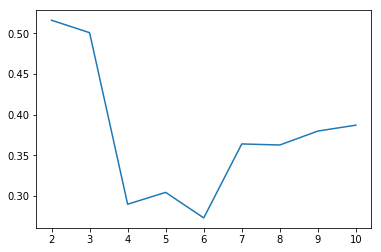

In [173]:
# Plotando o valor de silhueta por cluster
sns.lineplot(x=([2, 3, 4, 5, 6, 7, 8, 9, 10]), y=sil)

### Mesmo que o maior valor presente no cluester esteja em k=2, utilizarei k=3 pelas seguintes razões: 
    1. O valor da silhueta não têm decaimento tão significante de um para o outro;
    2. Desejo extrair uma discriminação um pouco mais minuciosa dos dados e acredito que apenas dois clusters não irá segmentar o suficiente estes dados.

In [174]:
# Chamando novamente o modelo, agora com k=3 e fazendo novamente o .fit()
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [175]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [176]:
X_std["clusters"] = kmeans.labels_

X_std.clusters.value_counts()

0    1699
2     166
1      68
Name: clusters, dtype: int64

### 5.1 Visualizações

### A intenção agora é visualizar através da plotagem de gráficos, como os clusters foram divididos e buscar por insights sobre o comportamento dos clientes.

In [177]:
# "Resetando" o index do dataset abaixo
X_std.reset_index(inplace=True)
X_std = X_std[["customer_unique_id", "clusters"]]

X_std

,customer_unique_id,clusters
0,0006fdc98a402fceb4eb0ee528f6a8d4,0
1,003162bf0351f47a1a247992b8b9b42d,0
2,009062f98089a091615b5c9faa13de26,0
3,00aba8ca6b7a455bcde671692a3f9e51,0
4,00ae9ea276a5a4335382c9391059ddf2,0
5,00ba737b18a7996f68cb8a99556bedd4,2
6,00c003ed13c76042b78d53fbc26930d0,0
7,00c05fe9d2f8b245f1f86fe559175f24,0
8,00d96f54b90a6ffbe7361bcfdb85b0ba,0
9,00e984e99fdfd52943156d2d7eb4a5e6,0


In [178]:
df_cluster = pd.merge(es_df, X_std, on="customer_unique_id")

df_cluster.clusters.value_counts()

0    1740
2     413
1      75
Name: clusters, dtype: int64

In [201]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2227 entries, 0 to 2226
Data columns (total 19 columns):
order_id                    2227 non-null object
order_item_id               2227 non-null int64
product_id                  2227 non-null object
seller_id                   2227 non-null object
price                       2227 non-null float64
freight_value               2227 non-null float64
product_category_name       2227 non-null object
customer_id                 2227 non-null object
order_status                2227 non-null object
order_purchase_timestamp    2227 non-null datetime64[ns]
customer_unique_id          2227 non-null object
customer_city               2227 non-null object
customer_state              2227 non-null object
purchase_hour               2227 non-null int64
purchase_dawn               2227 non-null int32
purchase_day                2227 non-null int32
purchase_afternoon          2227 non-null int32
purchase_night              2227 non-null int32
cluster

c:\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
c:\python37\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
c:\python37\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
c:\python37\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


<Figure size 4032x3024 with 0 Axes>

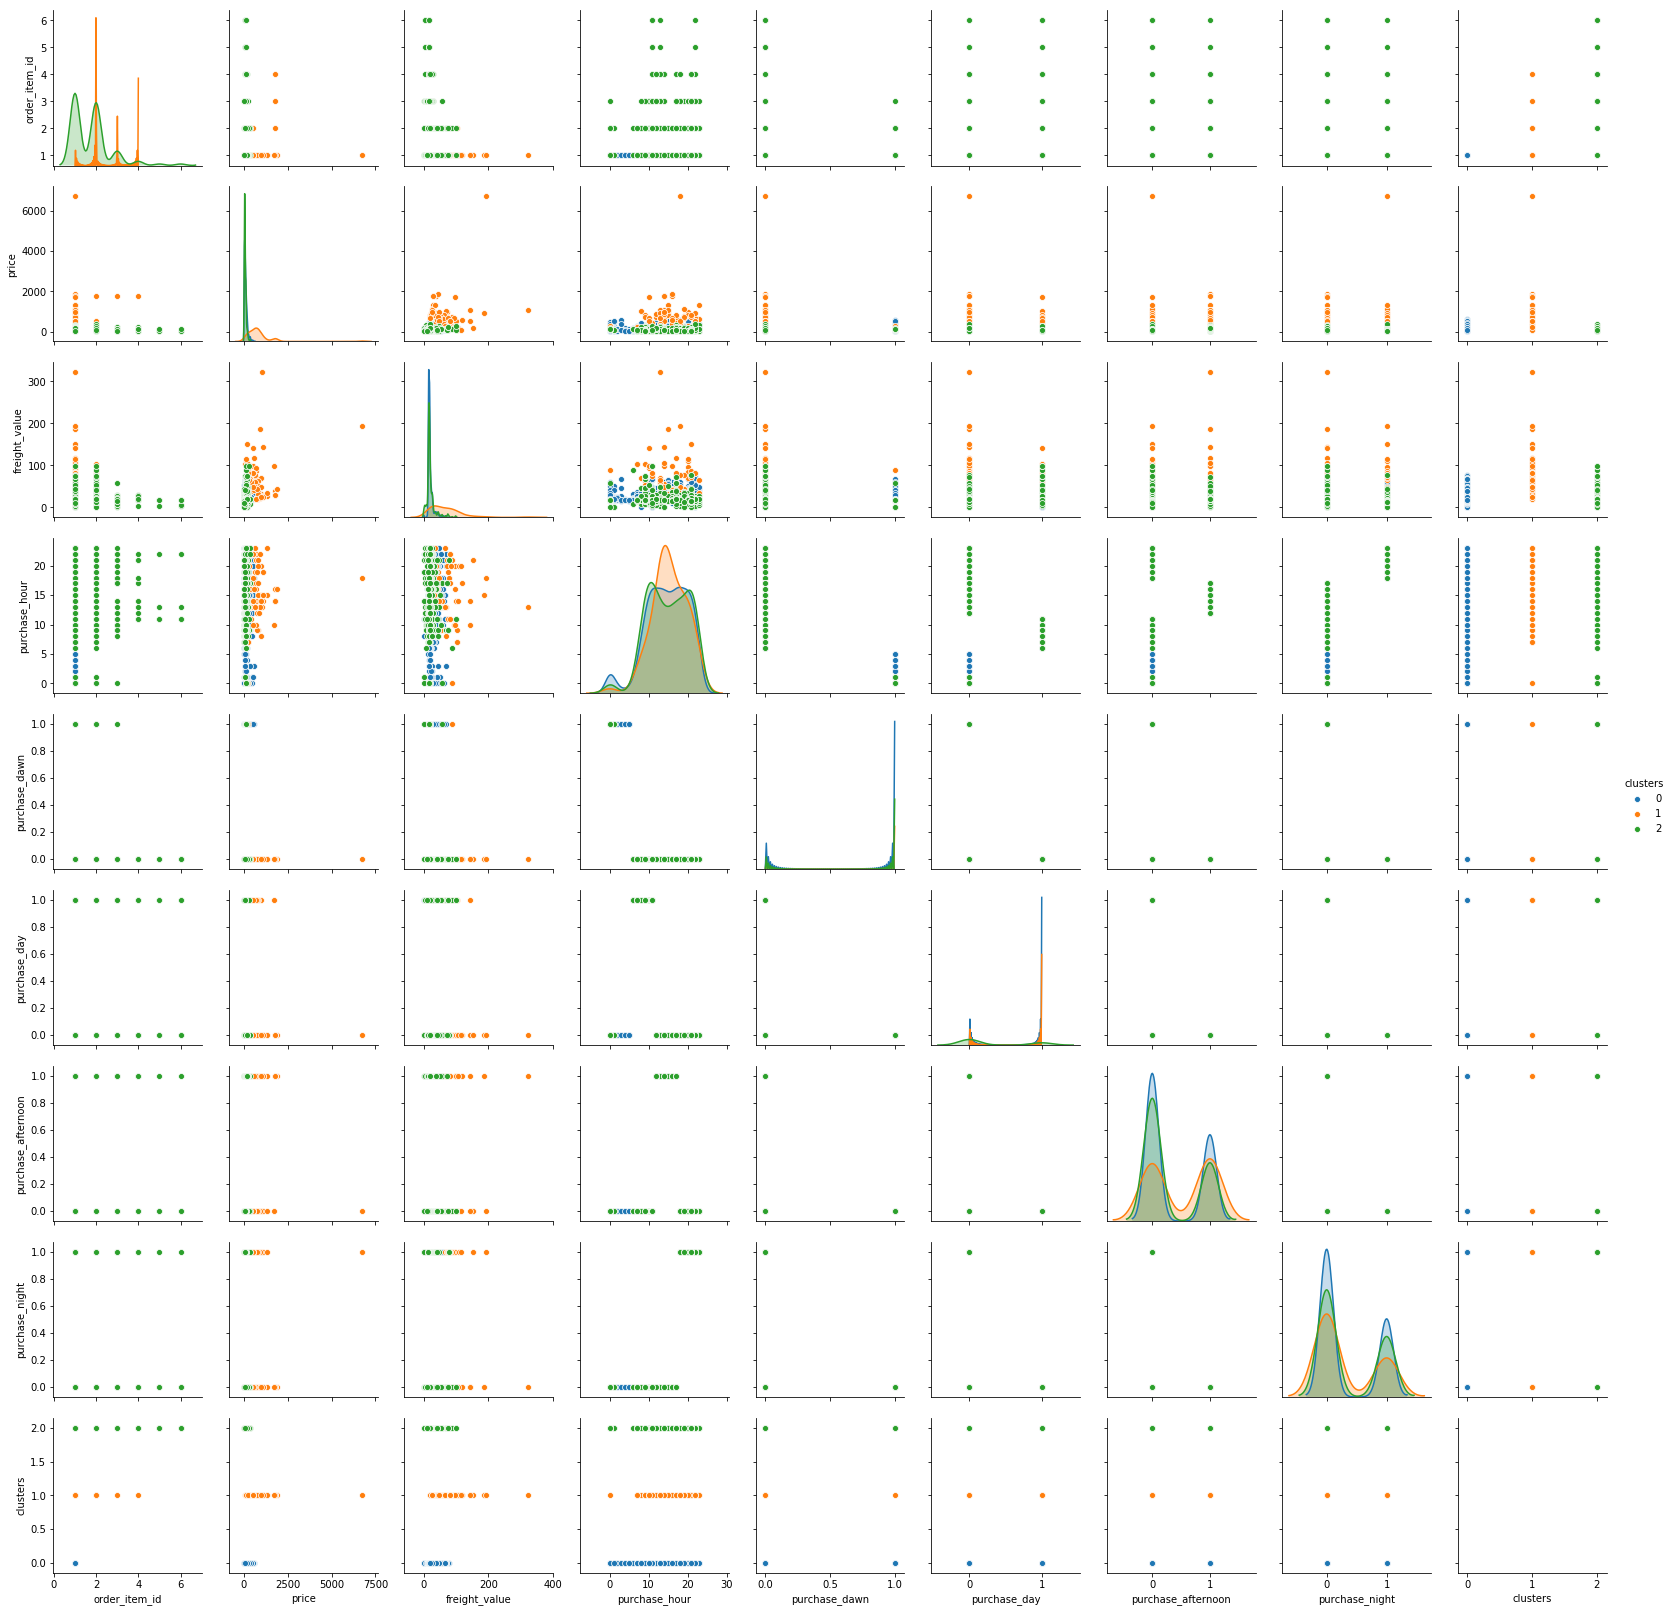

In [183]:
sns.pairplot(df_cluster, hue= "clusters")

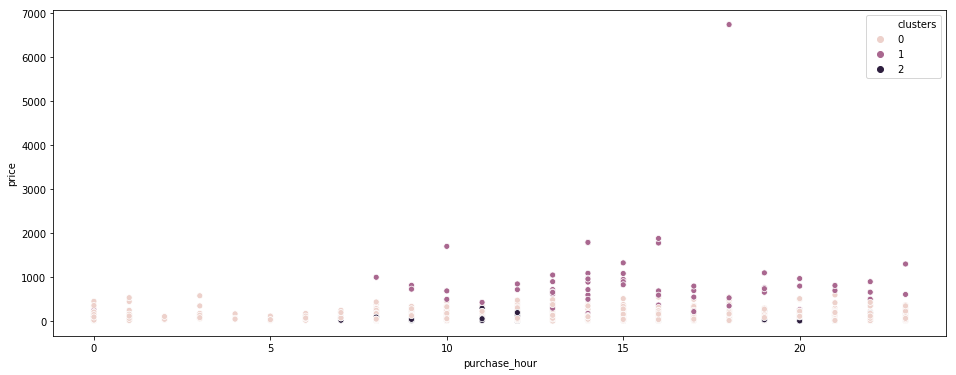

In [189]:
# Plotando o comportamento de horas da compra x por preço por produto
plt.figure(figsize=(16,6))
sns.scatterplot(x=df_cluster.purchase_hour, y=df_cluster.price, hue=df_cluster.clusters)

### Uma descoberta interessante, era de se esperar que os valores maiores de produtos, ocorressem durante a madrugada, onde o cansaço/sono podem atrapalhar a capacidade de julgamento e autocontrole. E pelo que pode se observar, os picos de compras com maiores valores, aparecem por volta de 8 horas e continuam até as 23 horas.

### É possível notar também, que os maiores picos de preço, pertencem ao cluster 1. Vamos analisar melhor a destribuição de valores da compra, por cluster.

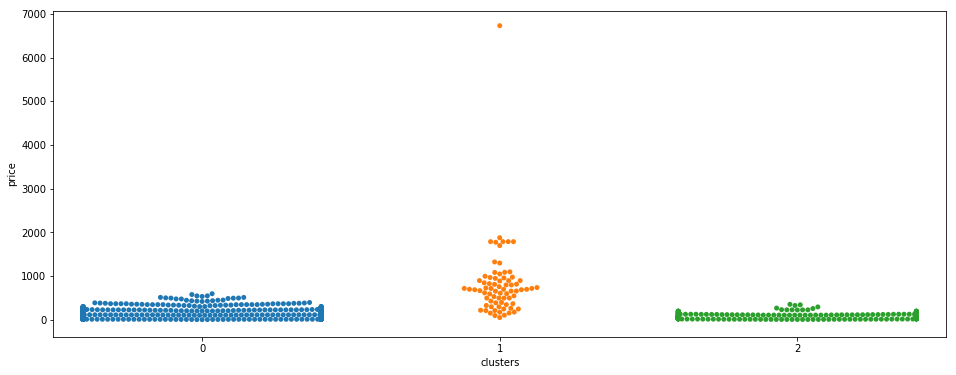

In [190]:
# Plotando preço por item x cluster
plt.figure(figsize=(16,6))
sns.swarmplot(x=df_cluster.clusters, y=df_cluster.price)

### Mesmo com um outlier presente, forçando o gráfico a compactar a visualização, é possível notar que realmente os integrantes do cluster 1 possuem a tendência de gastar um valor mais alto em um único produto. Mas para uma melhor observação, irei retirar o outlier.

In [191]:
# Econtrando o outlier
df_cluster[df_cluster.price > 3000]

,order_id,order_item_id,product_id,seller_id,price,freight_value,product_category_name,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,customer_state,purchase_hour,purchase_dawn,purchase_day,purchase_afternoon,purchase_night,clusters
2227,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,6729.0,193.21,pcs,f48d464a0baaea338cb25f816991ab1f,delivered,2018-07-25 18:10:17,459bef486812aa25204be022145caa62,vitoria,ES,18,0,0,0,1,1


In [192]:
# Eliminando o outlier
df_cluster.drop([2227], inplace=True)

# Checando a eliminação do outlier
df_cluster[df_cluster.price > 3000]

,order_id,order_item_id,product_id,seller_id,price,freight_value,product_category_name,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,customer_state,purchase_hour,purchase_dawn,purchase_day,purchase_afternoon,purchase_night,clusters


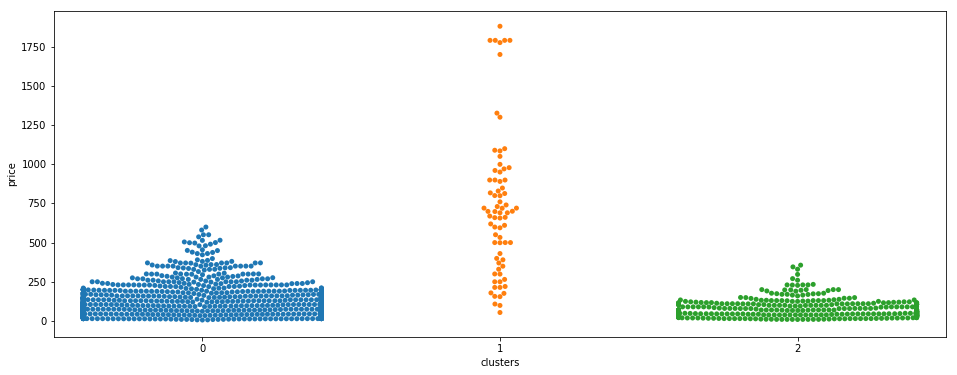

In [193]:
# Plotando novamente o os preços x cluster
plt.figure(figsize=(16,6))
sns.swarmplot(x=df_cluster.clusters, y=df_cluster.price)

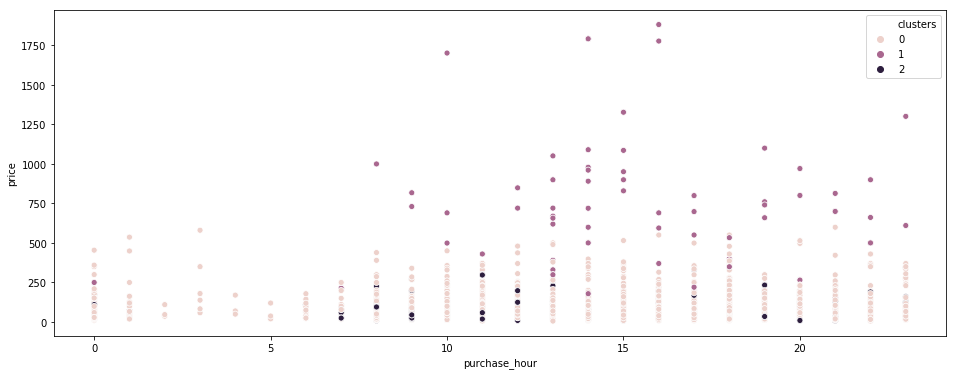

In [202]:
# Plotando novamente o gráfico de horas de compra sem o outlier
plt.figure(figsize=(16,6))
sns.scatterplot(x=df_cluster.purchase_hour, y=df_cluster.price, hue=df_cluster.clusters)

### De forma bem mais clara, podemos ver agora como é a dispersão dos preços por produto para o cluster 1. Comprovando que em média, os integrantes desse grupo, gastam mais em um item individualmente.

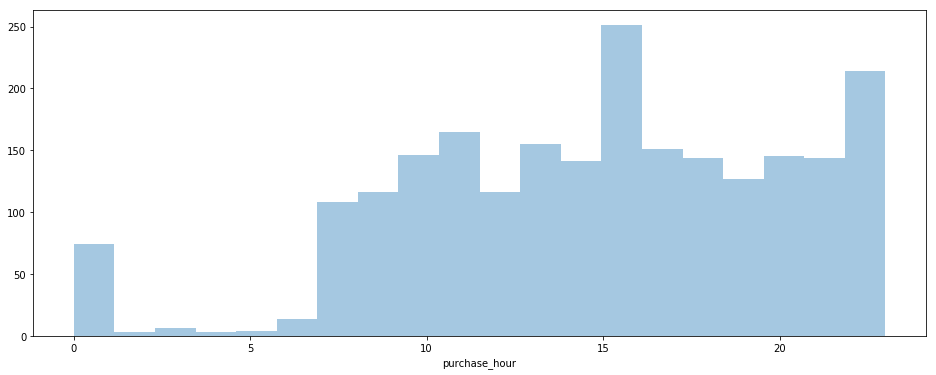

In [200]:
# Gráfico de distribuição das horas de compra
plt.figure(figsize=(16,6))
sns.distplot(a=df_cluster.purchase_hour, kde=False, bins=20)

### Analisando a distribuição das horas de compra, vemos que há picos de compra proxímo às 15h/16h, como também proxímo às 23h/0h. Tendo uma queda durante a madrugada e tendo um volume mais estavél a partir de 7h.


## Até o momento é possível extrair os seguintes conhecimentos: 
    - As pessoas no Espírito Santo compram com menor volume durante a madrugada e as que compram, não gastam valores altos em um único produto;
    - Os integrantes do cluster 1 no entanto, gastam mais individualmente em produtos e suas compras parecem começar as 9h da manhã e ir até 00h, tendo uma maior consentração entre 12h às 15h;
    - Há picos de compra durante o dia, ao enterno de 15h/16h e 23h/00h;